In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
import DeepSparseCoding.utils.image_processing as ip
import DeepSparseCoding.utils.plot_functions as pf

ImportError: No module named 'DeepSparseCoding'

In [ ]:
weights = np.load("/home/dpaiton/CAE_Project/32768_min_compress_pcm_weights.npz")["data"]

In [ ]:
l1_weights = weights[5].reshape((81, 128))
bf_stats = ip.get_dictionary_stats(l1_weights, padding=256, num_gauss_fits=10, gauss_thresh=0.2)

In [ ]:
fig = pf.plot_data_tiled(l1_weights.T.reshape(128, 9, 9), normalize=True)

In [ ]:
fig = pf.plot_loc_freq_summary(bf_stats)

In [ ]:
fig = pf.plot_bf_stats(bf_stats, num_bf=10)

In [ ]:
#TODO: Why are these weird?
fig = pf.plot_gaussian_contours(bf_stats, num_plots=128)

In [ ]:
fig = pf.plot_ellipse_summaries(bf_stats, num_bf=128, lines=True)

In [ ]:
activities = pickle.load(open("/home/dpaiton/CAE_Project/32768_min_compress_pcm_ulist.npz", "rb"))

In [ ]:
num_imgs = activities[0].shape[0]
l1_act_corr = 0
for x_idx in range(64):
  for y_idx in range(64):
    l1_act = activities[1][:, x_idx, y_idx, :]
    cent_l1_act = l1_act - np.mean(l1_act, axis=0)
    norm_l1_act = np.divide(cent_l1_act, np.std(cent_l1_act, axis=0))
    conv_act_corr = np.dot(norm_l1_act.T, norm_l1_act) / num_imgs
    l1_act_corr += conv_act_corr
l1_act_corr /= 64*64

l2_act_corr = 0
for x_idx in range(32):
  for y_idx in range(32):
    l2_act = activities[2][:, x_idx, y_idx, :]
    cent_l2_act = l2_act - np.mean(l2_act, axis=0)
    norm_l2_act = np.divide(cent_l2_act, np.std(cent_l2_act, axis=0))
    conv_act_corr = np.dot(norm_l2_act.T, norm_l2_act) / num_imgs
    l2_act_corr += conv_act_corr
l2_act_corr /= 32*32

In [ ]:
fig = pf.plot_cov_matrix(l1_act_corr, str(num_imgs))
fig = pf.plot_cov_matrix(l2_act_corr, str(num_imgs))

In [2]:
l1_act_evals, l1_act_evecs = np.linalg.eig(l1_act_corr)
l2_act_evals, l2_act_evecs = np.linalg.eig(l2_act_corr)

NameError: name 'l1_act_corr' is not defined

In [3]:
l1_norm_evals = l1_act_evals - (np.identity(l1_act_evals.shape[0])*l1_act_evals)
l2_norm_evals = l2_act_evals - (np.identity(l2_act_evals.shape[0])*l2_act_evals)
fig, ax = plt.subplots(1)
ax.scatter(l1_norm_evals, l2_norm_evals)
ax.set_xlabel("layer 1 eigen values")
ax.set_ylabel("layer 2 eigen values")
ax.set_xlim([0,6])
ax.set_ylim([0,6])
ax.plot([0,6], [0,6], 'r')
plt.show()

NameError: name 'l1_act_evals' is not defined

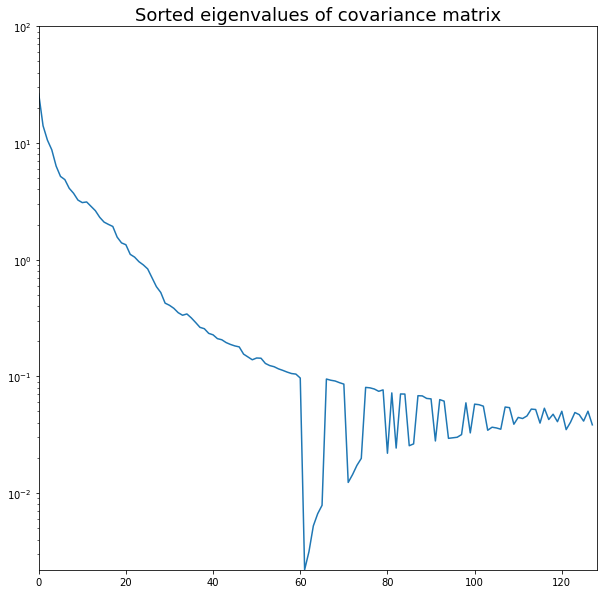

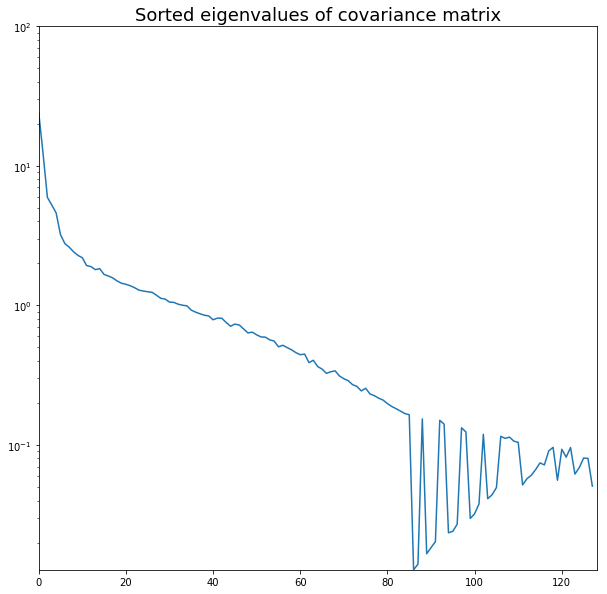

In [99]:
fig1 = pf.plot_eigenvalues(l1_act_evals, ylim=[0,100])
fig2 = pf.plot_eigenvalues(l2_act_evals, ylim=[0,100])

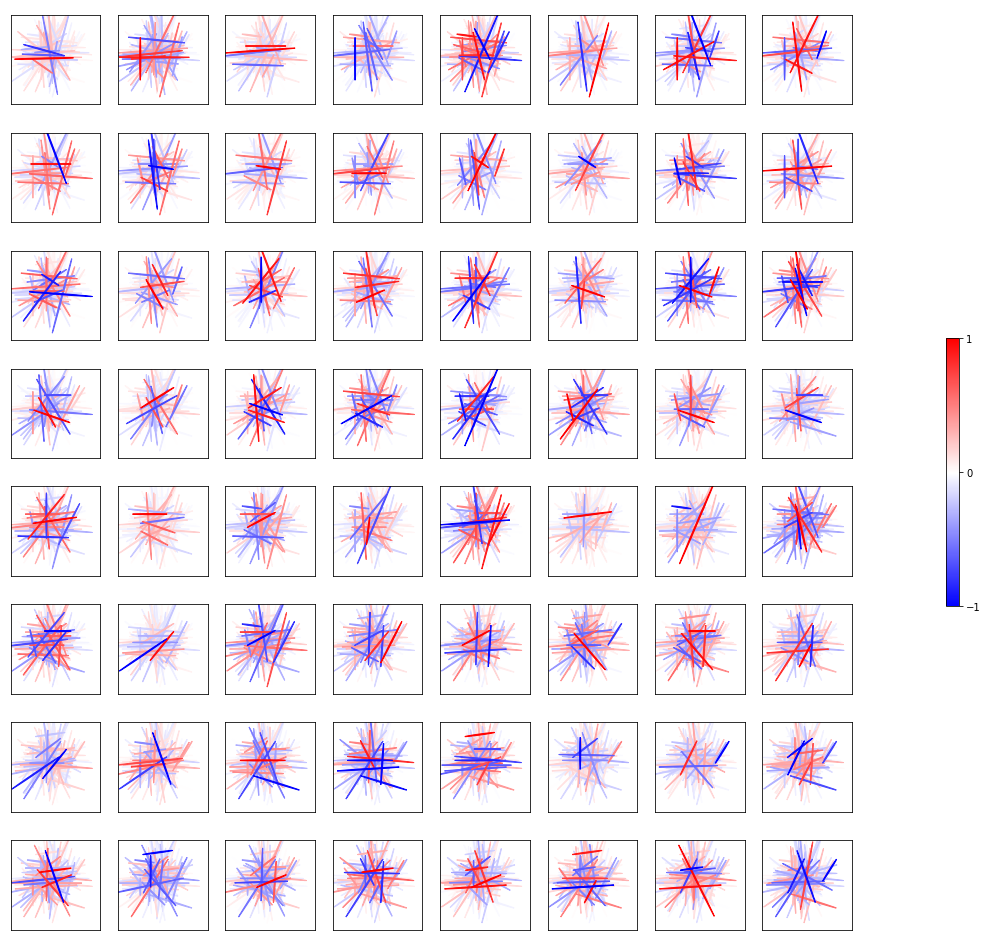

In [100]:
fig = pf.plot_pooling_summaries(bf_stats, act_evecs, num_pooling_filters=64, num_connected_weights=128, lines=True)

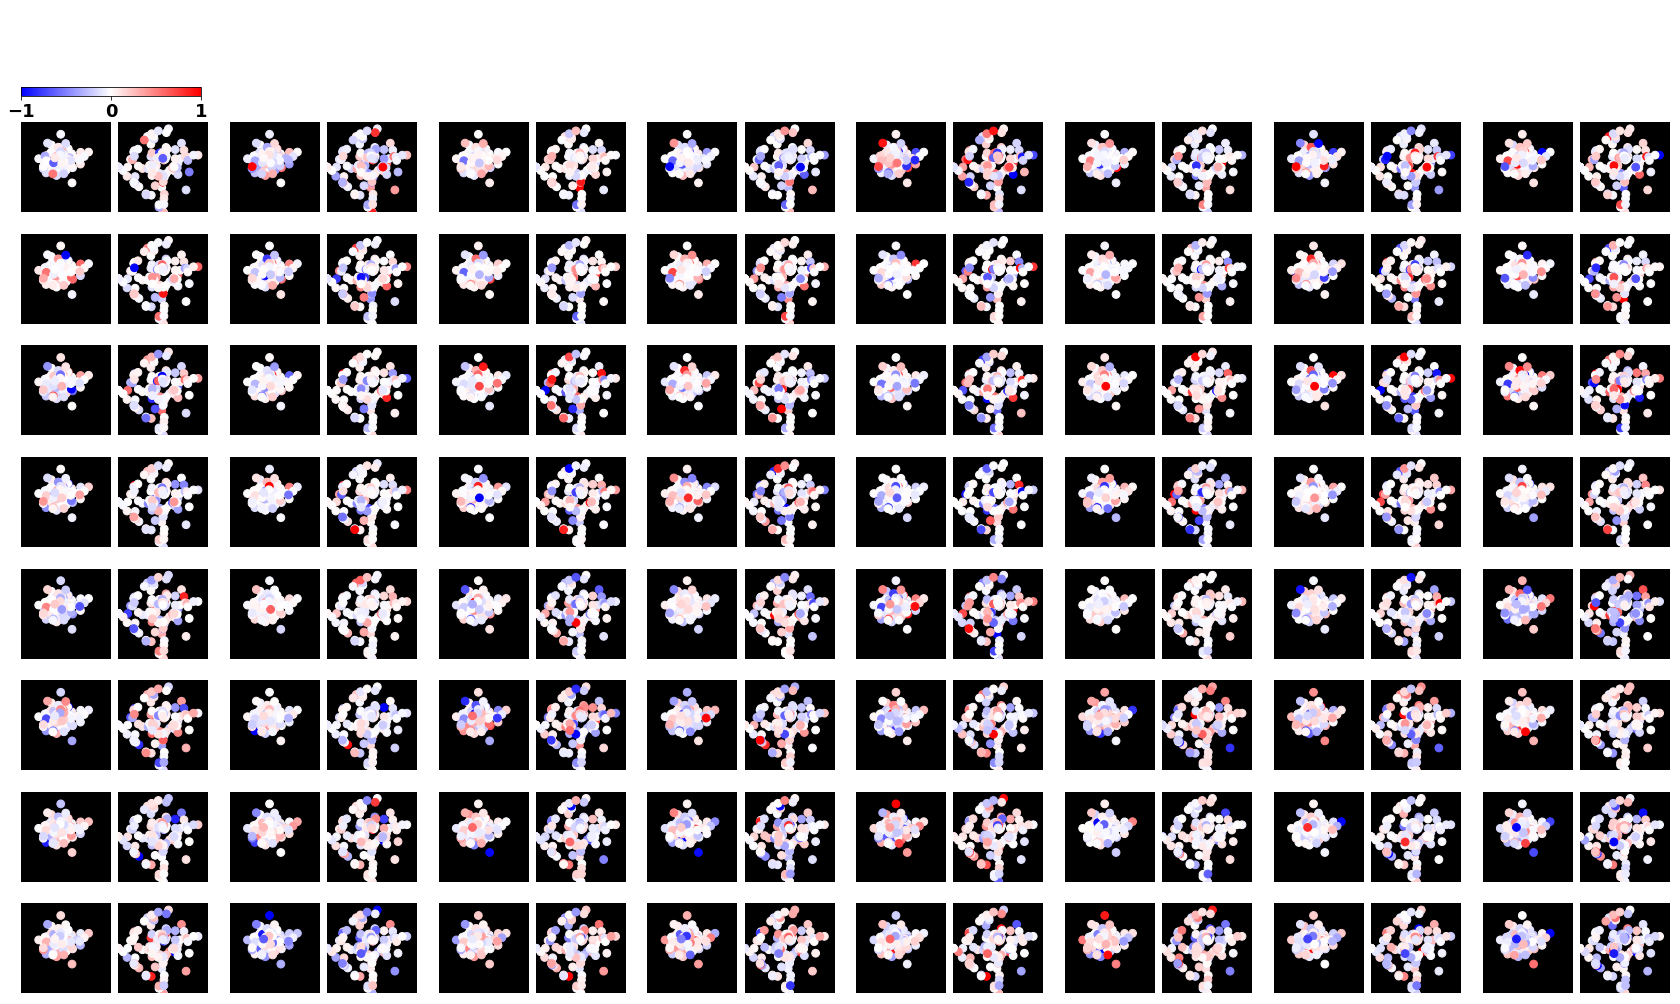

In [102]:
fig = pf.plot_pooling_centers(bf_stats, act_evecs, num_pooling_filters=64, fig_size=(10,10), spot_size=60)

In [1]:
gdn_weights = [weights[19+i] for i in range(3)]
fig, ax = plt.subplots(1, 4, figsize=(20,20))
for i in range(3):
  im = ax[i].imshow(gdn_weights[i], vmin=0, vmax=1, cmap="Greys_r")
  ax[i].set_title("GDN weights for layer "+str(i))
pf.clear_axis(ax[-1])
pf.add_colorbar_to_im(ax[-1].imshow(np.ones(gdn_weights[0].shape), vmin=0, vmax=1, cmap="Greys_r"))
plt.show()

NameError: name 'weights' is not defined

# TODO:
  * compute corr over larger image set
  * mask GDN outputs, quantify correlations
  * design convolution vis for 2nd layer